# **Feature Reduction Techniques and Classification Models**

# **Data Set Description:**

Title : Algerian Forest Fires Dataset

Link : https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

The dataset includes 122 instances data of regions of Algeria,namely the Bejaia region located in the northeast of Algeria.

The period from June 2012 to September 2012.
The dataset includes 13 attribues and 1 output attribue (class)


**Attribute Information:**

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

# **Importing Data set into Google Collab**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving New_Algerian_forest_fires_dataset.csv to New_Algerian_forest_fires_dataset.csv


# **Read Data Set:**

In [ ]:
import pandas as pd
info = pd.read_csv('New_Algerian_forest_fires_dataset.csv')
info.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


## **Segregation of X and Y**

In [ ]:
X = info.drop('Classes',axis=1)
y = info['Classes']
print(X.shape)
print(y.shape)


(122, 13)
(122,)


# **Standardize features**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(97, 13)
(25, 13)
(97,)
(25,)


# **Feature Reduction Techniques:**

**Linear Discriminant Analysis(LDA)**


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(X_train, y_train)
x_test_lda = lda.transform(X_test)
print(x_train_lda.shape)
print(x_test_lda.shape)

(97, 1)
(25, 1)


**Principal Component Analysis(PCA)**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components='mle')
pca.fit(X_train)
x_train_pca=pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)
print(x_train_pca.shape)
print(x_test_pca.shape)

(97, 12)
(25, 12)


# **Classification Models:**

**SVM on LDA reduced dataset**

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train_lda, y_train)
y_pred_lda=model.predict(x_test_lda)
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_lda))
print(classification_report(y_test,y_pred_lda))

Confusion Matrix
[[11  1]
 [ 0 13]]
              precision    recall  f1-score   support

        fire       1.00      0.92      0.96        12
    not fire       0.93      1.00      0.96        13

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



**SVM on PCA reduced dataset**

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train_pca, y_train)
y_pred_pca=model.predict(x_test_pca)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_pca))
print(classification_report(y_test,y_pred_pca))

Confusion Matrix
[[11  1]
 [ 0 13]]
              precision    recall  f1-score   support

        fire       1.00      0.92      0.96        12
    not fire       0.93      1.00      0.96        13

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



**Naive Bayes on LDA reduced dataset**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train_lda, y_train)
y_pred_lda=model.predict(x_test_lda)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_lda))
print(classification_report(y_test,y_pred_lda))

Confusion Matrix
[[11  1]
 [ 1 12]]
              precision    recall  f1-score   support

        fire       0.92      0.92      0.92        12
    not fire       0.92      0.92      0.92        13

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



 **Naive Bayes on PCA reduced dataset**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train_pca, y_train)
y_pred_pca=model.predict(x_test_pca)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_pca))
print(classification_report(y_test,y_pred_pca))

Confusion Matrix
[[10  2]
 [ 1 12]]
              precision    recall  f1-score   support

        fire       0.91      0.83      0.87        12
    not fire       0.86      0.92      0.89        13

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



**Decision Tree on LDA reduced dataset**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train_lda, y_train)
y_pred_lda=model.predict(x_test_lda)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_lda))
print(classification_report(y_test,y_pred_lda))

Confusion Matrix
[[12  0]
 [ 1 12]]
              precision    recall  f1-score   support

        fire       0.92      1.00      0.96        12
    not fire       1.00      0.92      0.96        13

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



**Decision Tree On PCA reduced dataset**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train_pca, y_train)
y_pred_pca=model.predict(x_test_pca)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_pca))
print(classification_report(y_test,y_pred_pca))

Confusion Matrix
[[12  0]
 [ 1 12]]
              precision    recall  f1-score   support

        fire       0.92      1.00      0.96        12
    not fire       1.00      0.92      0.96        13

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



# **Inference:**

After performing feature reduction techniques, the data is used on classification models. To evaluate, confusion matrix is used.
As the dataset classes are balanced, Accuracy metric is used for comparing the models

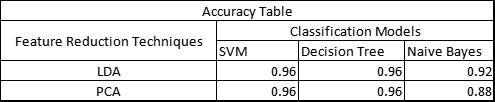


From the above table, 

On Comparing the feature reduction techniques, LDA is performing better than PCA with slight difference.

On Comparing the classification models, SVM and Decision tree are performing better compared than to Naive Bayes with slight difference